# 그래프로 시각화 해보기

          1등당첨금액     2등당첨금액   3등당첨금액  4등당첨금액  5등당첨금액
2     1585019672   52833990  1524241   50000    5000
3     1627457225   52839521  1209466   50000    5000
4     1708576825   54762078  1574435   50000    5000
5     2837323167   66499762  1641337   50000    5000
6     3231193735   60679695  1512732   50000    5000
...          ...        ...      ...     ...     ...
1036           0          0  6033800  166500   10000
1037           0  211191200  7282400  152100   10000
1038  2000000000          0  1174100   54900   10000
1039  2002006800   94866800  1842000  100800   10000
1040           0  143934100  5140500  113400   10000

[1039 rows x 5 columns]


C:\Users\user\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 54924 (\N{HANGUL SYLLABLE HOE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 52264 (\N{HANGUL SYLLABLE CA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 45817 (\N{HANGUL SYLLABLE DANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 52392 (\N{HANGUL SYLLABLE CEOM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44552 (\N{HANGUL SYLLABLE GEUM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\anaconda3\lib\

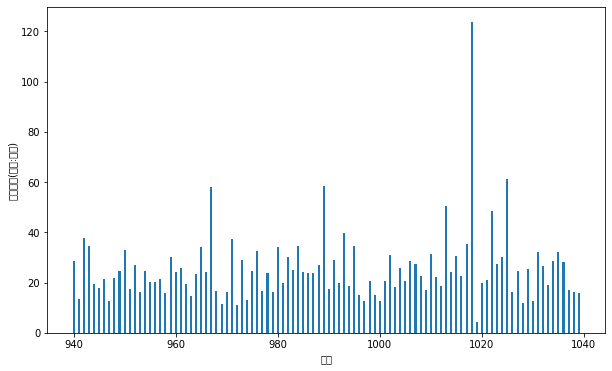

In [8]:
#데이터 값을 읽어오기 위해 pandas 임포트
import pandas as pd
#그래프로 시각화하기 위하여 matplotlib.pyplot 임포트
import matplotlib.pyplot as plt

from matplotlib import rc,font_manager

#파일의 경로 지정
file_path = r'C:\Users\user\로또번호 시각화하기\lotto.xlsx'
#openpyxl을 엔진으로 사용하여 pandas의 데이터프레임으로 엑셀 파일을 불러옵니다.
df_from_excel = pd.read_excel(file_path,engine='openpyxl')
#데이터프레임의 0번,1번 인덱스를 삭제합니다.
df_from_excel = df_from_excel.drop(index=[0,1])

#columns의 이름 재정의
df_from_excel.columns =[
    '년도','회차','추첨일','1등당첨자수','1등당첨금액',
    '2등당첨자수','2등당첨금액','3등당첨자수','3등당첨금액',
    '4등당첨자수','4등당첨금액','5등당첨자수','5등당첨금액',
    '당첨번호1','당첨번호2','당첨번호3','당첨번호4',
    '당첨번호5','당첨번호6','보너스번호'
]

#엑셀 파일을 확인하면 당첨금액이 숫자+,+원 형태로 되어있어 ,와 원을 제거(정구표현식 사용)
df_from_excel['1등당첨금액']=df_from_excel['1등당첨금액'].str.replace(pat=r'[ㄱ-ㅣ가-힣,]+',repl=r'',
                                                            regex=True)
df_from_excel['2등당첨금액']=df_from_excel['2등당첨금액'].str.replace(pat=r'[ㄱ-ㅣ가-힣,]+',repl=r'',
                                                            regex=True)
df_from_excel['3등당첨금액']=df_from_excel['3등당첨금액'].str.replace(pat=r'[ㄱ-ㅣ가-힣,]+',repl=r'',
                                                            regex=True)
df_from_excel['4등당첨금액']=df_from_excel['4등당첨금액'].str.replace(pat=r'[ㄱ-ㅣ가-힣,]+',repl=r'',
                                                            regex=True)
df_from_excel['5등당첨금액']=df_from_excel['5등당첨금액'].str.replace(pat=r'[ㄱ-ㅣ가-힣,]+',repl=r'',
                                                            regex=True)

#값을 숫자 형태로 다시 데이터프레임에 저장합니다.
#(엑셀 파일이 수정되는게 아닌 불러온 데이터프레임 형식에서 수정됩니다.)
df_from_excel['1등당첨금액'] = pd.to_numeric(df_from_excel['1등당첨금액'])
df_from_excel['2등당첨금액'] = pd.to_numeric(df_from_excel['2등당첨금액'])
df_from_excel['3등당첨금액'] = pd.to_numeric(df_from_excel['3등당첨금액'])
df_from_excel['4등당첨금액'] = pd.to_numeric(df_from_excel['4등당첨금액'])
df_from_excel['5등당첨금액'] = pd.to_numeric(df_from_excel['5등당첨금액'])

#데이터프레임의 1등~5등당첨금액 열의 값들을 출력
print(df_from_excel[['1등당첨금액','2등당첨금액','3등당첨금액','4등당첨금액','5등당첨금액']])

#폰트 설정
font_path = r'C:\Windows\Fonts\NGULIM.TTF'
font = font_manager.FontProperties(fname=font_path).get_name()
#한글폰트 사용을 위한 설정
rc('font',family=font)

#회차 열의 마지막 100개의 데이터만 사용
x=df_from_excel['회차'].iloc[:100].values
#1등당첨금액 열의 마지막 100개 데이터만 사용, 
price = df_from_excel['1등당첨금액'].iloc[:100].values/100000000

#그래프 시각화
#그래프 초기 표시 크기 설정
plt.figure(figsize=(10,6))
#x축 이름 설정
plt.xlabel('회차')
#y축 이름 변경
plt.ylabel('당첨금액(단위:억원)')
#바 그래프의 x,y값과 바 그래프의 폭을 지정해 그래프를 그립니다.
plt.bar(x,price,width=0.4)
#그래프 출력
plt.show()

## 같이보면 좋은 개념

matplotlib.font_manager
여러 플랫폼에서 글꼴을 찾고, 관리하고, 사용하기 위한 모듈입니다.

matplotlib.font_manager. FontProperties()
글꼴 속성을 저장하고 조작하기 위한 클래스입니다.

matplotlib.font_manager.FontProperties().get_name()
글꼴 속성과 가장 일치하는 글꼴의 이름을 반환합니다.

str.replace(): 문자열에서 발견되는 지정된 문자 또는 String을 다른 유니코드 문자나 String으로 변환
pat= 바꾸고 싶은 문자열 패턴, repl = 바꿀 문자열, regex= 지정된 패턴이 정규표현식인지에 대한 여부 